In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from mini_yolov3.model import MiniYoloV3
from mini_yolov3.trainer import Trainer
import torch
from torchvision.transforms import v2
from mini_yolov3.dataset import SVHNDataset, collate_fn
from torch.utils.data import Subset, DataLoader
from mini_yolov3.loss import YOLOLoss, build_targets
import matplotlib.pyplot as plt
from mini_yolov3.utils import draw_bounding_boxes
from torchvision.ops import box_convert
from mini_yolov3.evals import calculate_mAP
from torchvision.ops import box_iou

/Users/ericchen/Library/Caches/pypoetry/virtualenvs/mini-yolov3-a3VRlvzj-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
train_dataset = SVHNDataset(split="train")
# train_dataset = Subset(train_dataset, range(12, 13))
# train_dataset = Subset(train_dataset, range(0, 2))

In [5]:
train_dataset[0]["bbox"]

tensor([[0.3551, 0.0217, 0.1963, 0.8696],
        [0.5327, 0.0652, 0.1495, 0.8696]])

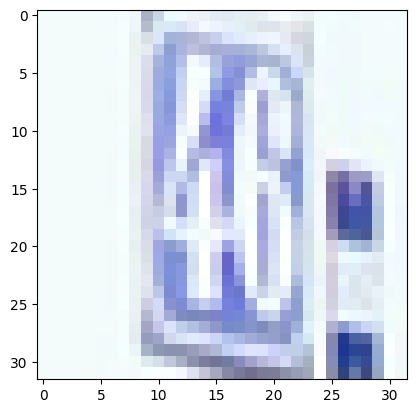

In [6]:
plt.imshow(train_dataset[0]["image"].permute(1, 2, 0))

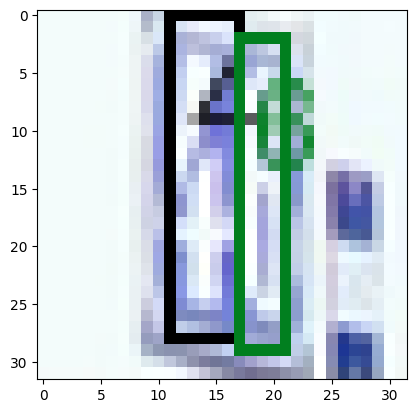

In [7]:
plt.imshow(
    draw_bounding_boxes(train_dataset[0]["image"], box_convert(train_dataset[0]["bbox"], "xywh", "xyxy"), train_dataset[0]["labels"])
)

In [17]:
dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)

In [8]:
for batch in dataloader:
    print(batch["bboxes"])
    print(box_convert(batch["bboxes"][0], "xywh", "cxcywh"))
    targets = build_targets(batch["bboxes"], batch["labels"], (2, 2), anchors, 10)

[tensor([[0.3385, 0.1429, 0.1538, 0.7143]]), tensor([[0.2903, 0.0732, 0.2043, 0.8537],
        [0.5269, 0.0488, 0.1720, 0.8537]])]
tensor([[0.4154, 0.5000, 0.1538, 0.7143]])


NameError: name 'anchors' is not defined

In [11]:
batch["images"].shape

NameError: name 'batch' is not defined

In [12]:
import json

In [21]:
torch.manual_seed(0)

config = json.load(open("./configs/smol.json", "r"))
model = MiniYoloV3(**config)

trainer = Trainer(
    model=model,
    train_dataset=train_dataset,
    num_epochs=1500,
    lr=3e-3,
    batch_size=64,
    lambda_coord=1,
    lambda_noobj=1,
    device="cpu"
)

In [14]:
trainer.train()

100%|██████████| 1500/1500 [00:15<00:00, 99.02it/s, class_loss=0.000624, coord_loss=8.73e-7, loss=0.00937, noobj_loss=0.00511, obj_conf_loss=0.00364] 


[45.92662811279297,
 41.61876678466797,
 39.18220901489258,
 37.16039276123047,
 35.476463317871094,
 33.67350387573242,
 31.745702743530273,
 30.44135093688965,
 29.46734046936035,
 28.48058319091797,
 27.472665786743164,
 26.527450561523438,
 25.653783798217773,
 24.836984634399414,
 24.09332275390625,
 23.436044692993164,
 22.84060287475586,
 22.2619686126709,
 21.690195083618164,
 21.11874008178711,
 20.558349609375,
 20.008487701416016,
 19.453264236450195,
 18.89460563659668,
 18.332847595214844,
 17.772340774536133,
 17.22121238708496,
 16.6845760345459,
 16.163619995117188,
 15.654328346252441,
 15.157771110534668,
 14.673005104064941,
 14.200180053710938,
 13.740234375,
 13.292972564697266,
 12.857086181640625,
 12.430757522583008,
 12.013442039489746,
 11.606513023376465,
 11.209150314331055,
 10.82105541229248,
 10.44310474395752,
 10.075617790222168,
 9.7158784866333,
 9.354504585266113,
 8.99945068359375,
 8.652698516845703,
 8.312986373901367,
 7.982632160186768,
 7.66193

In [15]:
pred = model(batch["images"])
pred.shape

torch.Size([2, 8, 8, 60])

In [16]:
pred[0, 0, 0, :], pred[0, 1, 1, :]

(tensor([-3.9462e-01, -1.1230e-01, -6.9168e-02,  1.6016e-01, -5.9085e+00,
          2.0061e-01,  3.2185e-02, -1.7628e-01,  1.1643e-01, -9.3103e-02,
         -2.1499e-01,  4.4524e-01, -4.0756e-01,  2.5660e-01, -4.4912e-01,
          3.6334e-01,  4.7141e-02, -3.0412e-01,  5.2850e-01, -9.9459e+00,
         -4.6275e-01, -6.8661e-01, -1.0211e+00, -9.2770e-01,  7.4557e-01,
         -8.3859e-01,  1.2773e+00, -5.8546e-01, -6.1444e-01, -8.1192e-01,
          8.3375e-01, -5.3556e-01,  1.4944e-01,  8.0637e-02, -8.4804e+00,
         -7.4178e-01,  3.6093e-01, -3.4259e-01,  6.1325e-01,  1.1258e+00,
         -8.8351e-01, -3.1762e-01,  1.7881e+00, -5.7155e-01,  3.8759e-01,
          1.6574e-01, -8.6968e-01, -3.4068e-01, -3.8388e-01, -9.5233e+00,
          7.0744e-01,  5.9996e-03, -1.8295e-01,  2.8828e-01, -3.0996e-01,
          6.4816e-01, -2.1485e-01,  5.2846e-01, -7.8313e-01, -2.3655e-01],
        grad_fn=<SliceBackward0>),
 tensor([ -0.4688,  -0.1452,   0.0843,  -0.0742,  -6.2110,   0.1915,   0.024

In [17]:
i = 0

In [18]:
output = model.inference(
    batch["images"],
)

bounding_boxes = output.bboxes
bounding_boxes

[{'bboxes': tensor([[0.5902, 0.5322, 0.1639, 0.7420],
          [0.4427, 0.5000, 0.1967, 0.7416]]),
  'confidence': tensor([0.9987, 0.9971]),
  'labels': tensor([1, 7]),
  'scores': tensor([0.9994, 0.9993])},
 {'bboxes': tensor([[0.4532, 0.4565, 0.1962, 0.8695],
          [0.6075, 0.5000, 0.1495, 0.8700]]),
  'confidence': tensor([0.9965, 0.9933]),
  'labels': tensor([4, 6]),
  'scores': tensor([0.9994, 0.9993])}]

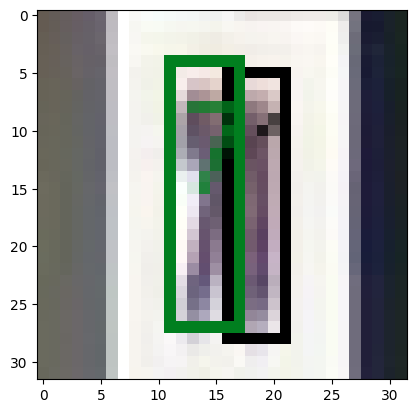

In [19]:
plt.imshow(
    draw_bounding_boxes(batch["images"][i],
                        box_convert(
                            bounding_boxes[i]["bboxes"], 
                            "cxcywh",
                            "xyxy"
                        ), 
                        bounding_boxes[i]["labels"]
)
)

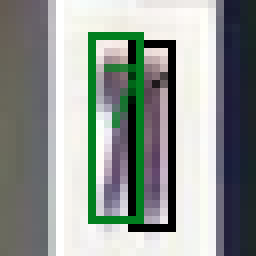

In [20]:
draw_bounding_boxes(batch["images"][i],
                        box_convert(
                            bounding_boxes[i]["bboxes"], 
                            "cxcywh",
                            "xyxy"
                        ), 
                        bounding_boxes[i]["labels"]
).resize((256, 256), 0)

In [22]:
calculate_mAP(
    model,
    trainer.train_loader,
)

100%|██████████| 522/522 [02:37<00:00,  3.30it/s]


{'map': 8.38032519823173e-06,
 'map_50': 4.9917543947231025e-05,
 'map_75': 3.415353830860113e-07,
 'map_small': 8.38032519823173e-06,
 'map_medium': -1.0,
 'map_large': -1.0,
 'mar_1': 0.0006142518250271678,
 'mar_10': 0.005399799440056086,
 'mar_100': 0.00685293972492218,
 'mar_small': 0.00685293972492218,
 'mar_medium': -1.0,
 'mar_large': -1.0,
 'map_per_class': -1.0,
 'mar_100_per_class': -1.0,
 'classes': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}